In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Задаємо значення для зміних
np.random.seed(1)
n_samples = 100
n_features = 2

# Генеруємо випадкові значення для матриці ознак
data = np.random.randint(5000,20000, size=(n_samples,n_features))
columns = ['Feature 1','Feature 2', 'Target']
# Генеруємо випадкові значення для вектора цільової зміної
vector_target = np.random.choice([0, 1], size=(n_samples,1))
# Створюємо матрицю ознак
matrixOfFeatures = np.column_stack((data,vector_target))
# Впорядковуємо дані в таблицю і зберігаємо в окремий файл
df = pd.DataFrame(matrixOfFeatures, columns=columns)
df.to_csv('random.csv', index=False)
#  Виводимо значення
print("Випадково згенеровані дані")
print(pd.read_csv('random.csv'))

print("Матриця ознак: ")
print(matrixOfFeatures[:5])

Випадково згенеровані дані
    Feature 1  Feature 2  Target
0       18349       5235       1
1       17172      10192       0
2        5905      15955       1
3       12813       7895       0
4       10056       5144       0
..        ...        ...     ...
95       5183      11461       1
96       8640      12897       0
97      13597       8303       0
98      12264       5505       1
99      13147      10145       0

[100 rows x 3 columns]
Матриця ознак: 
[[18349  5235     1]
 [17172 10192     0]
 [ 5905 15955     1]
 [12813  7895     0]
 [10056  5144     0]]


Точність: {accuracy}
Матриця неправильно класифікованих прикладів
[[4 6]
 [5 5]]
Звіт по класифікації
              precision    recall  f1-score   support

           0       0.44      0.40      0.42        10
           1       0.45      0.50      0.48        10

    accuracy                           0.45        20
   macro avg       0.45      0.45      0.45        20
weighted avg       0.45      0.45      0.45        20



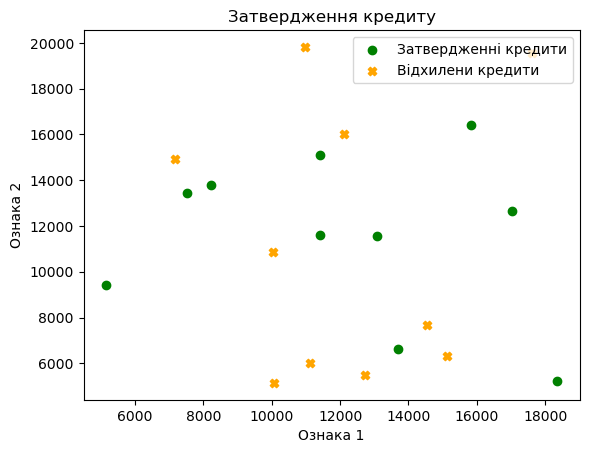

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
# Зчитуємо дані з файлу
data = pd.read_csv('random.csv')
data = data.dropna()

X = data[['Feature 1','Feature 2']]
y = data['Target']

from sklearn.model_selection import train_test_split
# Розділення даних на тренувальний та тестувальний набір
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.svm import SVC
# Створюємо лінійний SVC класифікатор
clf = SVC(kernel='linear',C=1.0)
# Тренуємо класифікатор на тренувальному наборі даних
clf.fit(X_train,y_train)
# Створюється передбачення на основі отриманих даних
y_pred = clf.predict(X_test)



from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Визначаємо точність моделі
accuracy = accuracy_score(y_test, y_pred)
print("Точність: {accuracy}")
# Вивід матриці неправильно класифікованих прикладів
conf_matrix = confusion_matrix(y_test, y_pred)
print("Матриця неправильно класифікованих прикладів")
print(conf_matrix)

#Звіт
class_report = classification_report(y_test, y_pred)
print("Звіт по класифікації")
print(class_report)


apr_category = X_test[y_test == 1]
reg_category = X_test[y_test == 0]

#Затверджені та відхилені кредити
plt.scatter(apr_category.iloc[:, 0], apr_category.iloc[:, 1], label='Затвердженні кредити', c='green', marker='o')
plt.scatter(reg_category.iloc[:, 0], reg_category.iloc[:, 1], label='Відхилени кредити', c='orange', marker='X')
# Графік
plt.title('Затвердження кредиту')
plt.xlabel('Ознака 1')
plt.ylabel('Ознака 2')
plt.legend(loc='best')
plt.show()